# **Прогнозування Відтоку Клієнтів для Телекомунікаційної компанії**

In [3]:
# @title
# імпорт бібліотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/sample_data/archive .zip')

In [5]:
# @title
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


Бачимо комірки з пропущеними даними, які потім потрібно буде заповнити. Всі комірки мають числові дані

In [7]:
#підрахуємо кількість пустих комірок по кожній із колонок
df.isna().sum()


,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


## Опис Колонок

- **id**: Унікальний номер, що присвоюється кожному клієнту.
- **is_tv_subscriber**: Чи підключено у клієнта кабельне або цифрове телебачення. (1 - так, 0 - ні).
- **is_movie_package_subscriber**: Чи платить клієнт додатково за пакет фільмів .
- **subscription_age**: Як довго ця людина є клієнтом компанії.
- **bill_avg**: Середня сума, яку клієнт сплачує щомісяця.
- **reamining_contract***: Скільки часу залишилося до закінчення обов'язкової угоди.
- **service_failure_count**: Кількість звернень у техпідтримку або зафіксованих аварій за певний період.
- **download_avg**: Обсяг використаного трафіку (ГБ) або середня швидкість завантаження.
- **upload_avg**: Обсяг вихідного трафіку (ГБ).
- **download_over_limit**: Показник того, скільки даних клієнт використав понад свій тарифний план.
- **churn**: Чи відмовився клієнт від послуг компанії?
  - **1 (Yes)**: Клієнт пішов.
  - **0 (No)**: Клієнт залишився.

In [8]:
#Статистика по DataFrame
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Колонки: is_tv_subscriber, is_movie_package_subscriber і churn є категоріальними

<Axes: xlabel='churn', ylabel='count'>

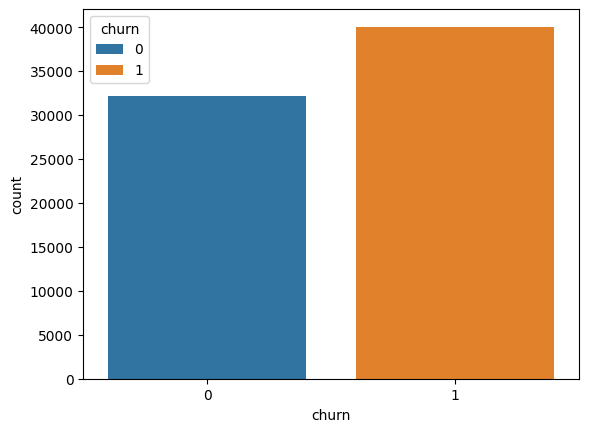

In [9]:
#Перевірка еа збалансованість класів цільової змінної
sns.countplot(data=df,x='churn',hue='churn')

Класи доволі добре збалансовані

In [10]:
#відсток відтоку
churn_rate = df['churn'].value_counts(normalize=True)[1] * 100
print(churn_rate)

55.41411849351081


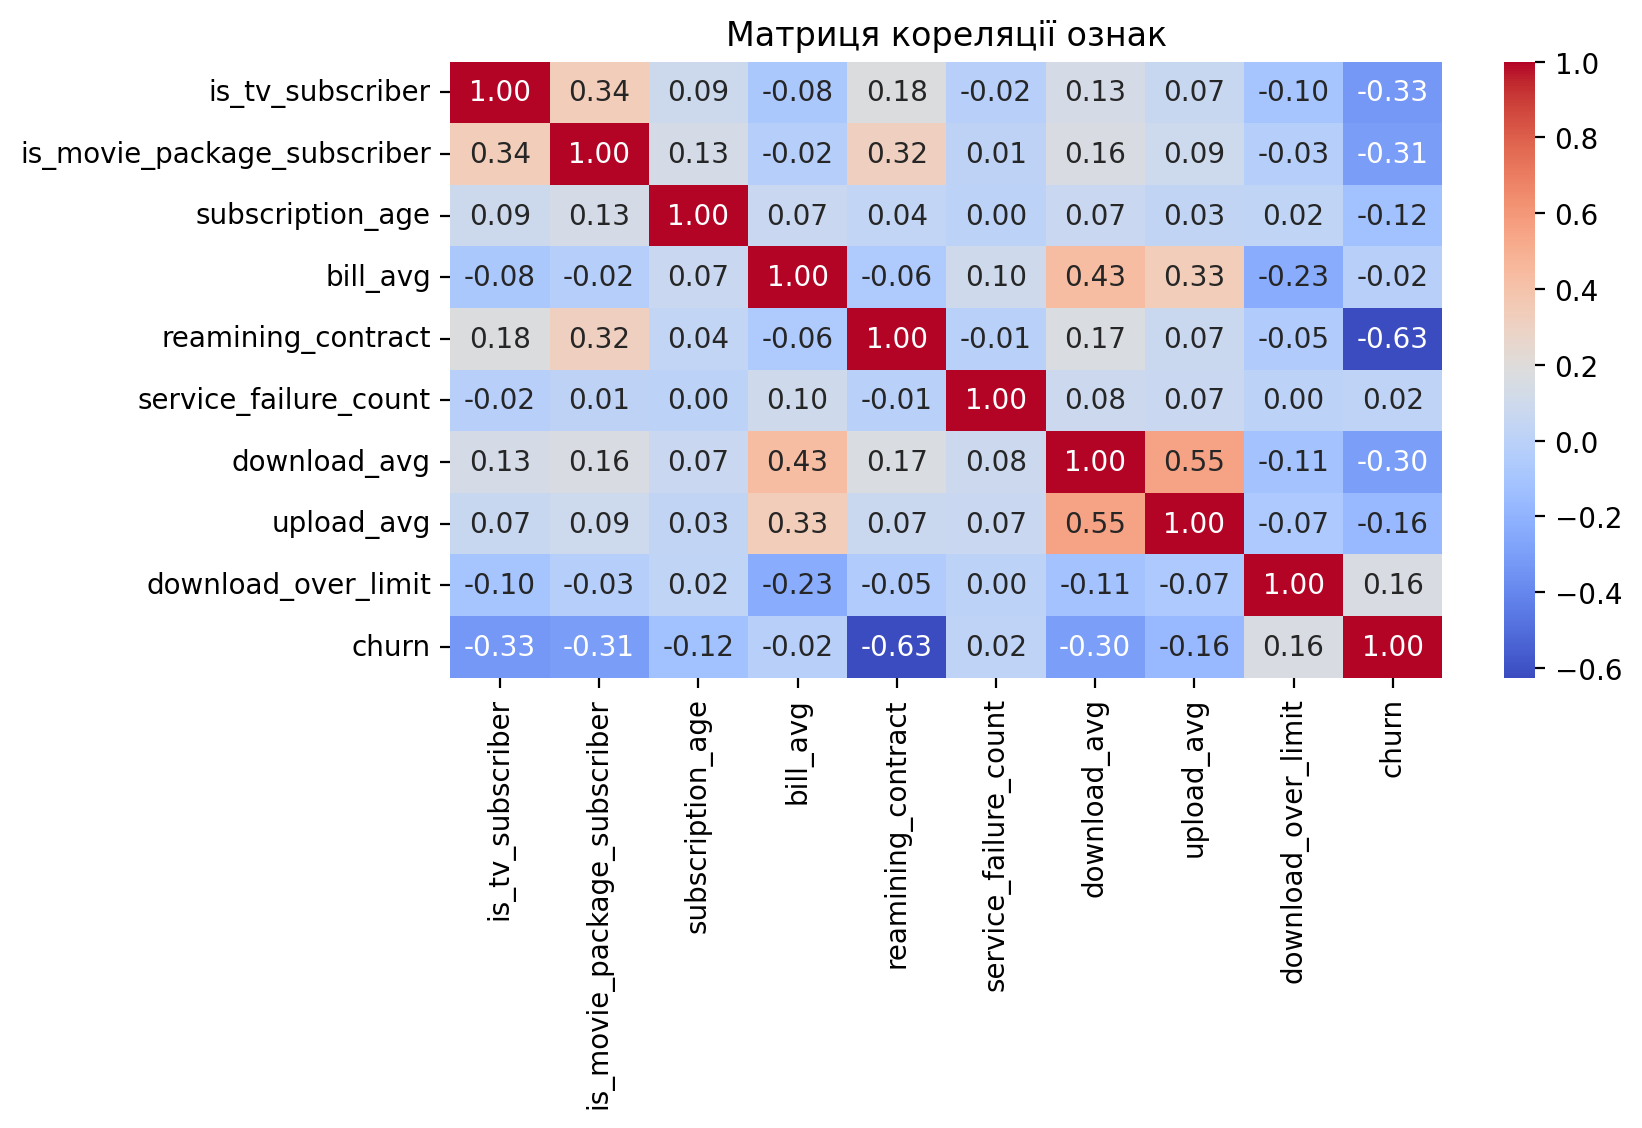

In [11]:
plt.figure(figsize=(8,4),dpi=200)
df_corr=df.drop('id', axis=1).corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матриця кореляції ознак')
plt.show()

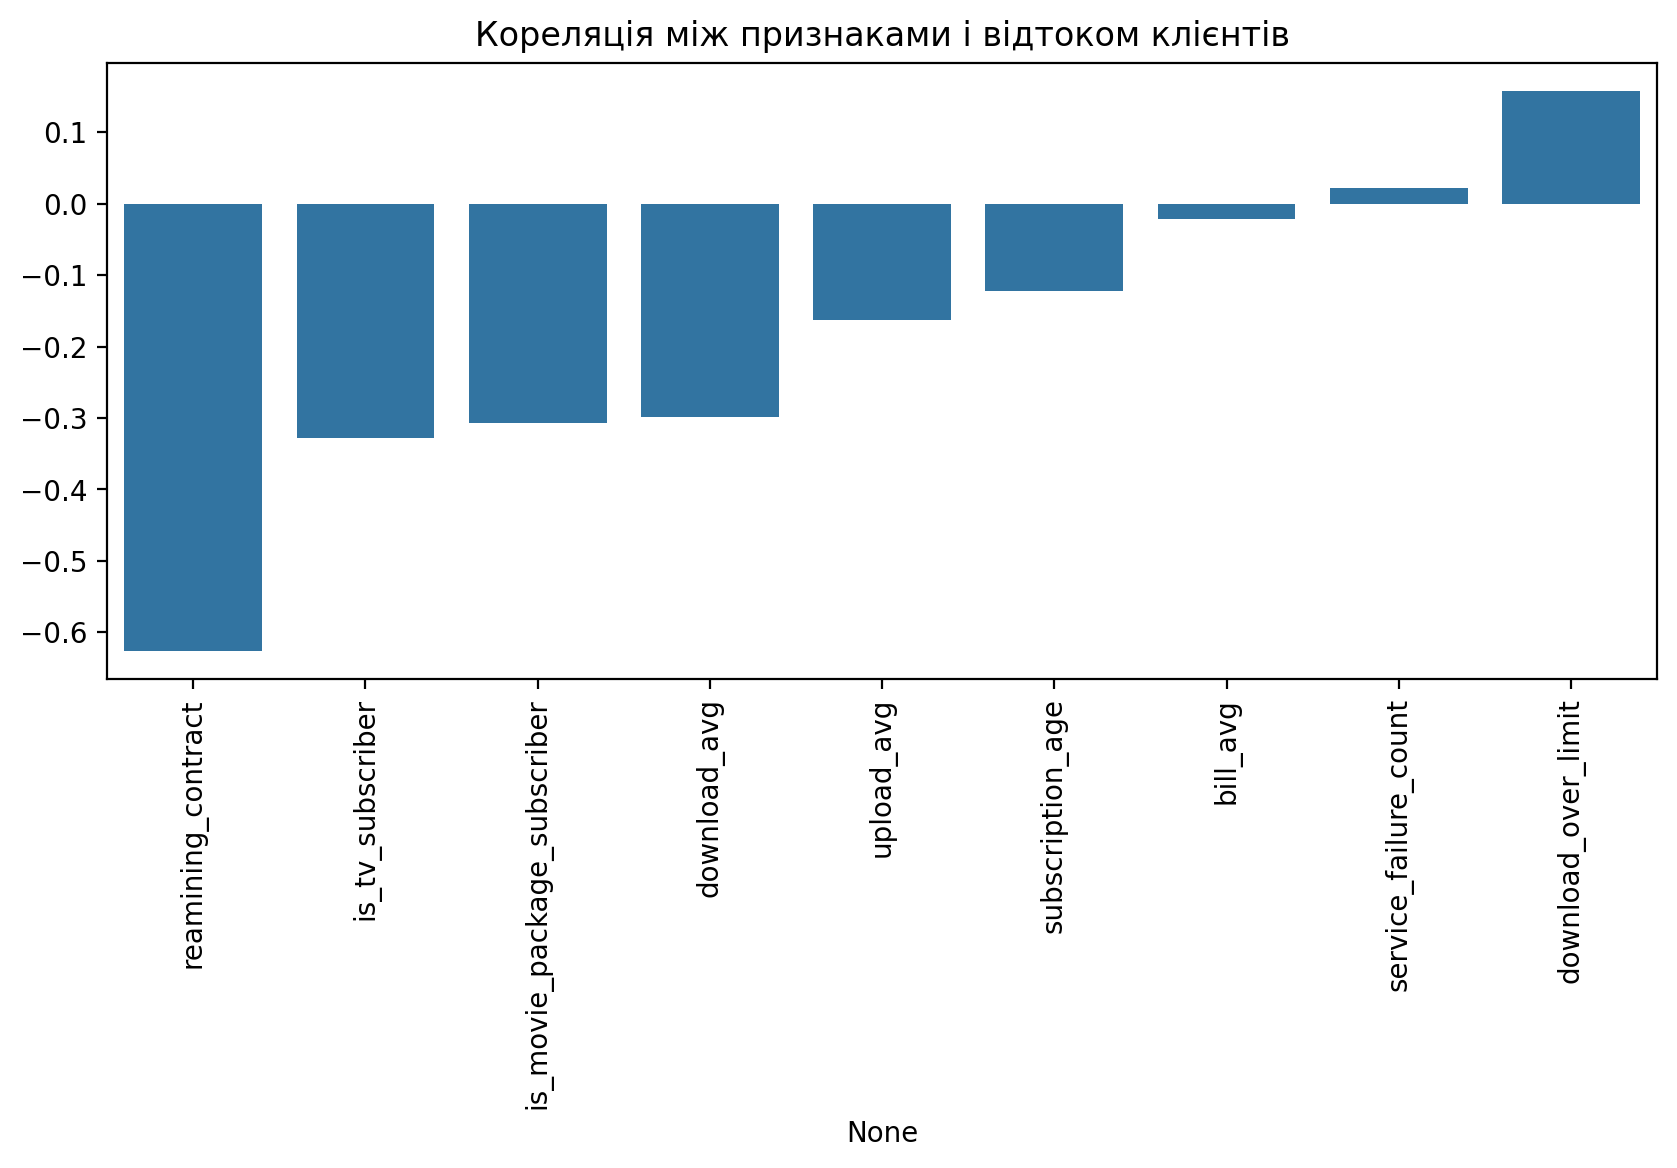

In [12]:
plt.figure(figsize=(10,4),dpi=200)
# Виключаємо кореляцію churn із самим собою перед сортуванням
churn_correlations = df_corr['churn'].drop('churn').sort_values()
sns.barplot(x=churn_correlations.index, y=churn_correlations.values)
plt.title("Кореляція між признаками і відтоком клієнтів")
plt.xticks(rotation=90);

Бачимо що на відток найбільше впливає:
1. Час до закінчення контракту
2. Відсутність підписки на кабельне телебачення
3. Відсутність підписки на кінотеатр
4. Низкий трафік може свідчити про шидкий віддік, а також термін підписки
5. Високий трафік навпаки говорить про відсутність ризику відтоку

Далі потрібно дослідити детально плив кожної цільової змінної з високою корецією.  

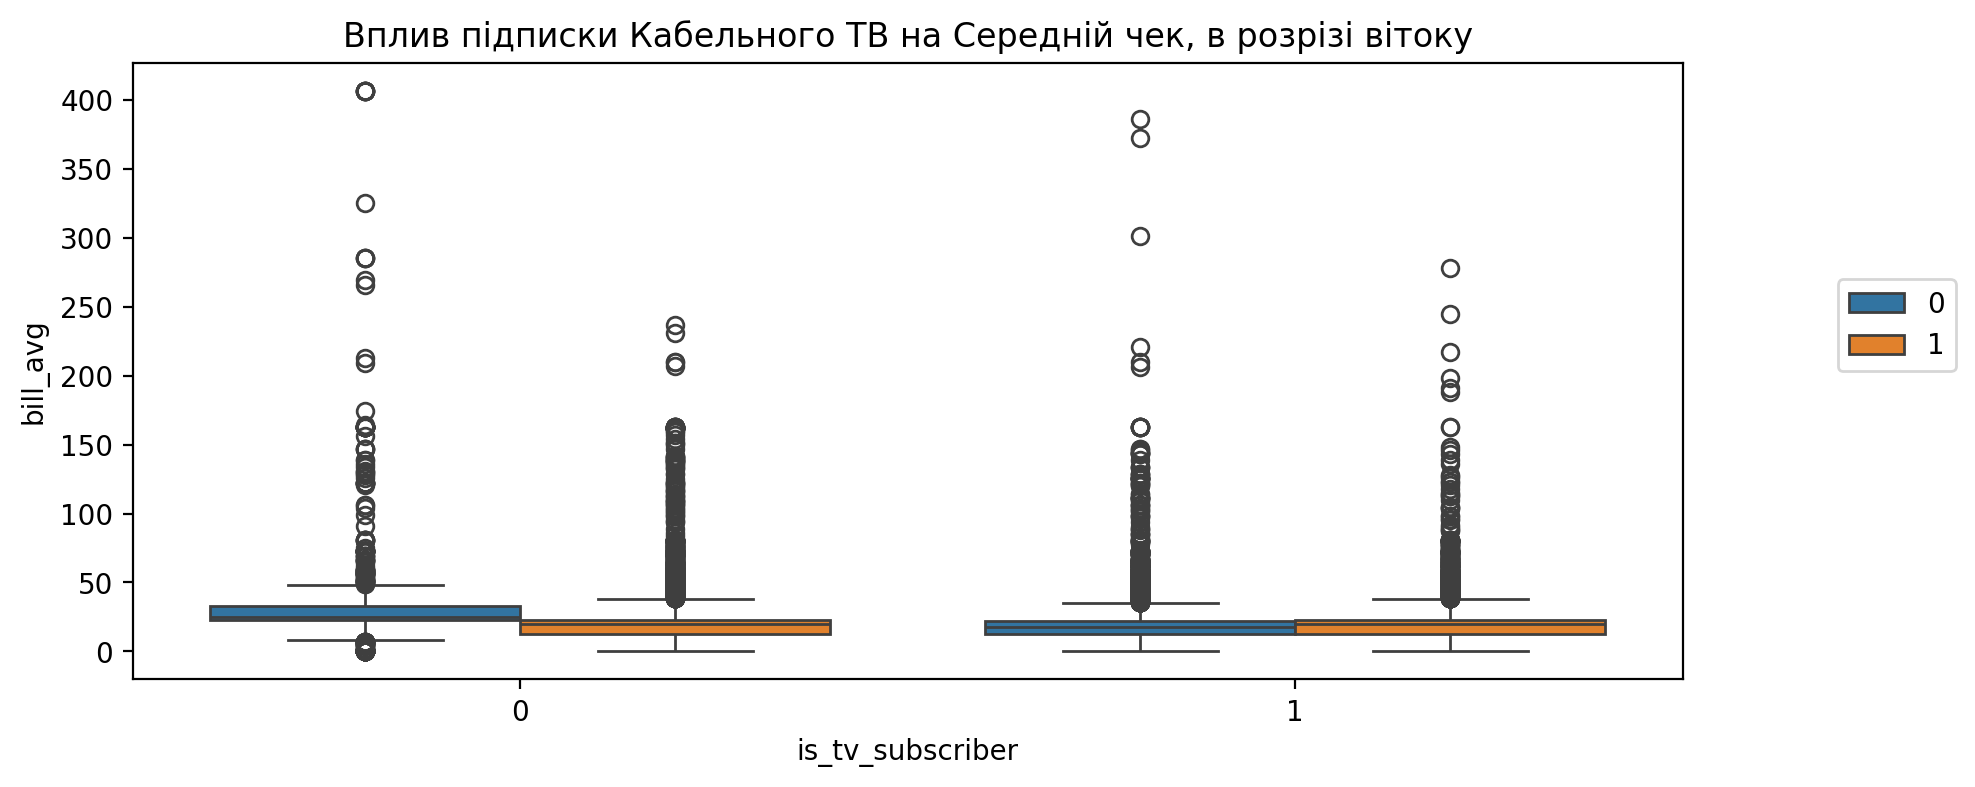

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='bill_avg',x='is_tv_subscriber',hue='churn')
plt.title('Вплив підписки Кабельного ТВ на Середній чек, в розрізі вітоку')
plt.legend(loc=(1.1,0.5))

як впливає сказати важко забагато викидів

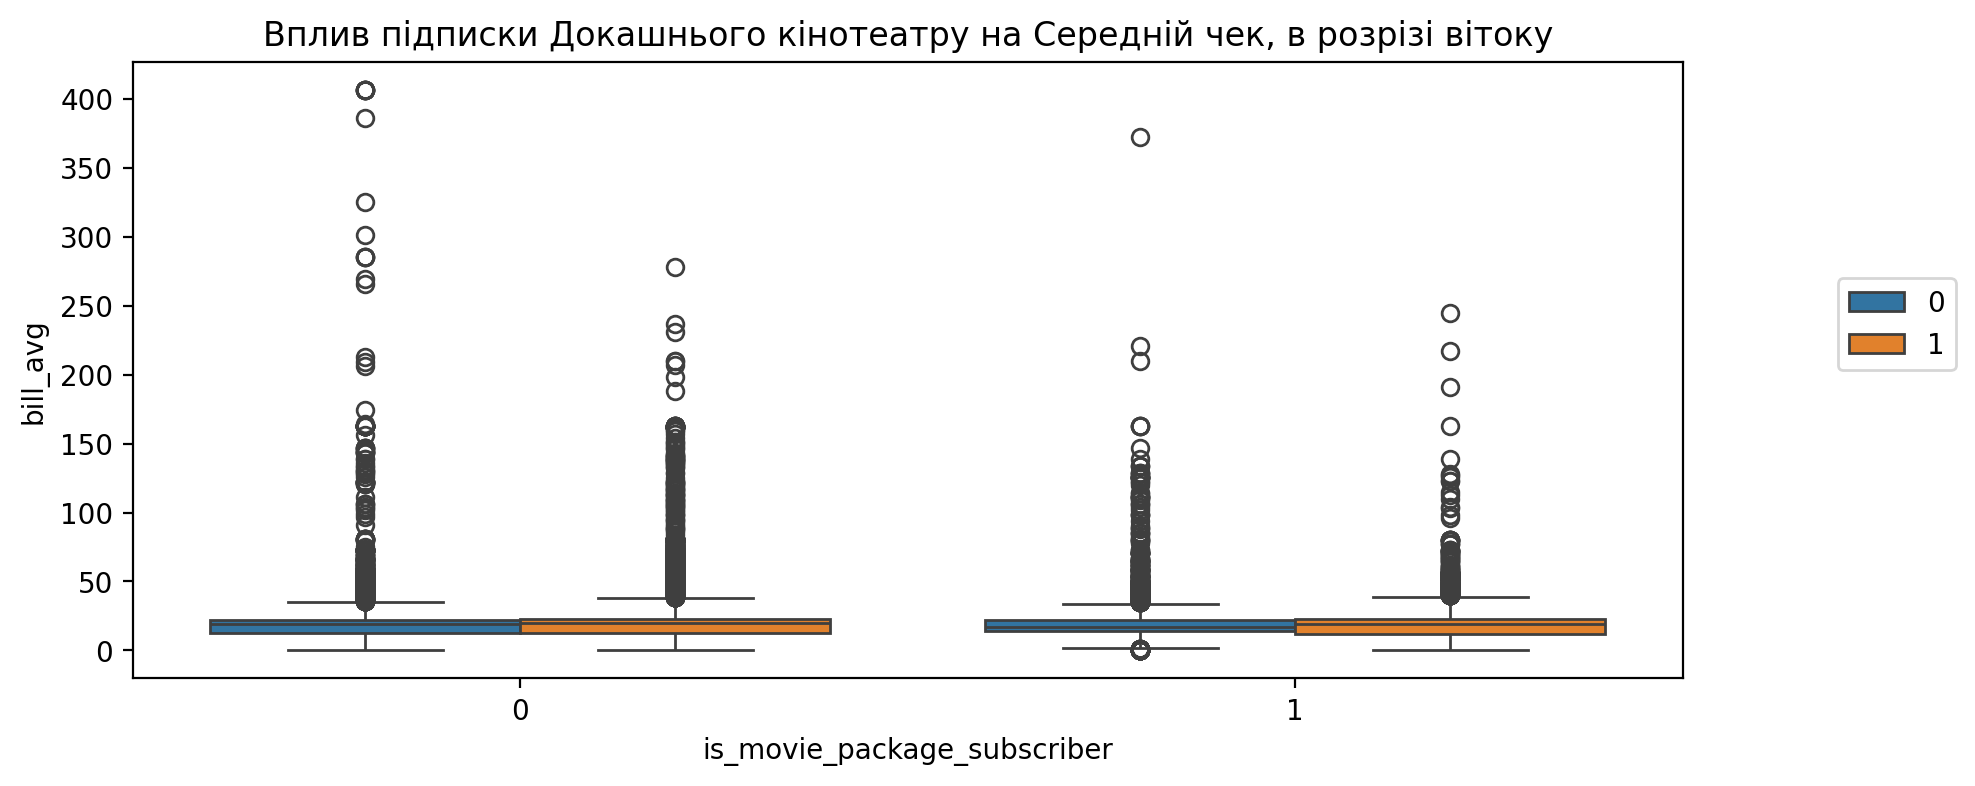

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='bill_avg',x='is_movie_package_subscriber',hue='churn')
plt.title('Вплив підписки Докашнього кінотеатру на Середній чек, в розрізі вітоку')
plt.legend(loc=(1.1,0.5))

як впливає сказати важко забагато викидів

<Axes: xlabel='subscription_age', ylabel='bill_avg'>

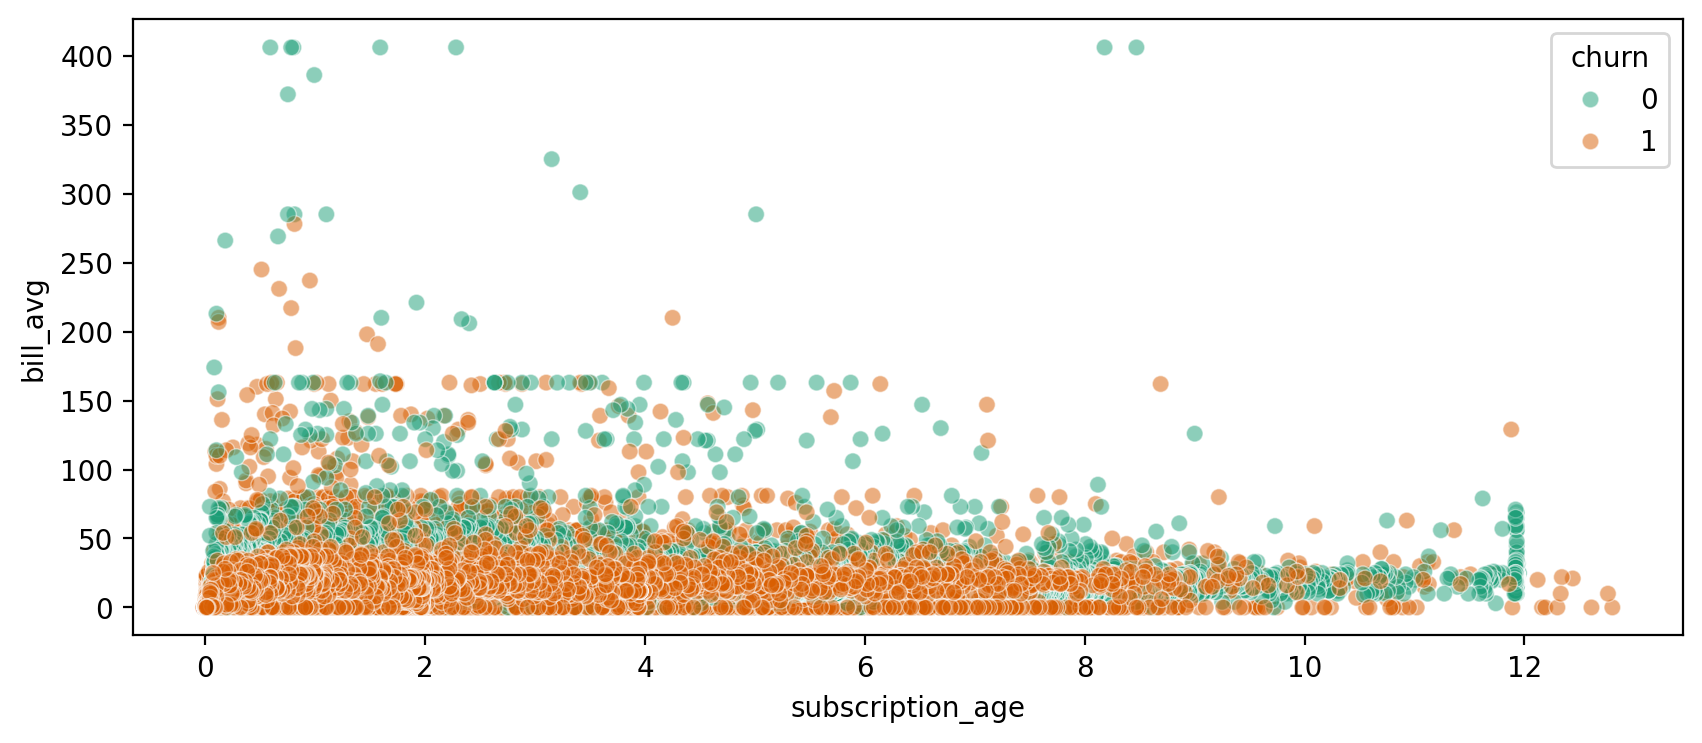

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='subscription_age', y='bill_avg', hue='churn', linewidth=0.5,alpha=0.5,palette='Dark2')

Відток клієнтів йде переважно з низьким чеком і поступово зменшується з терміном підписки послуги

/tmp/ipython-input-1921204488.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_contract_group = temp_df_contract.groupby('reamining_contract_group')['churn'].mean() * 100
/tmp/ipython-input-1921204488.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_contract_group.index, y=churn_rate_by_contract_group.values, palette='viridis')


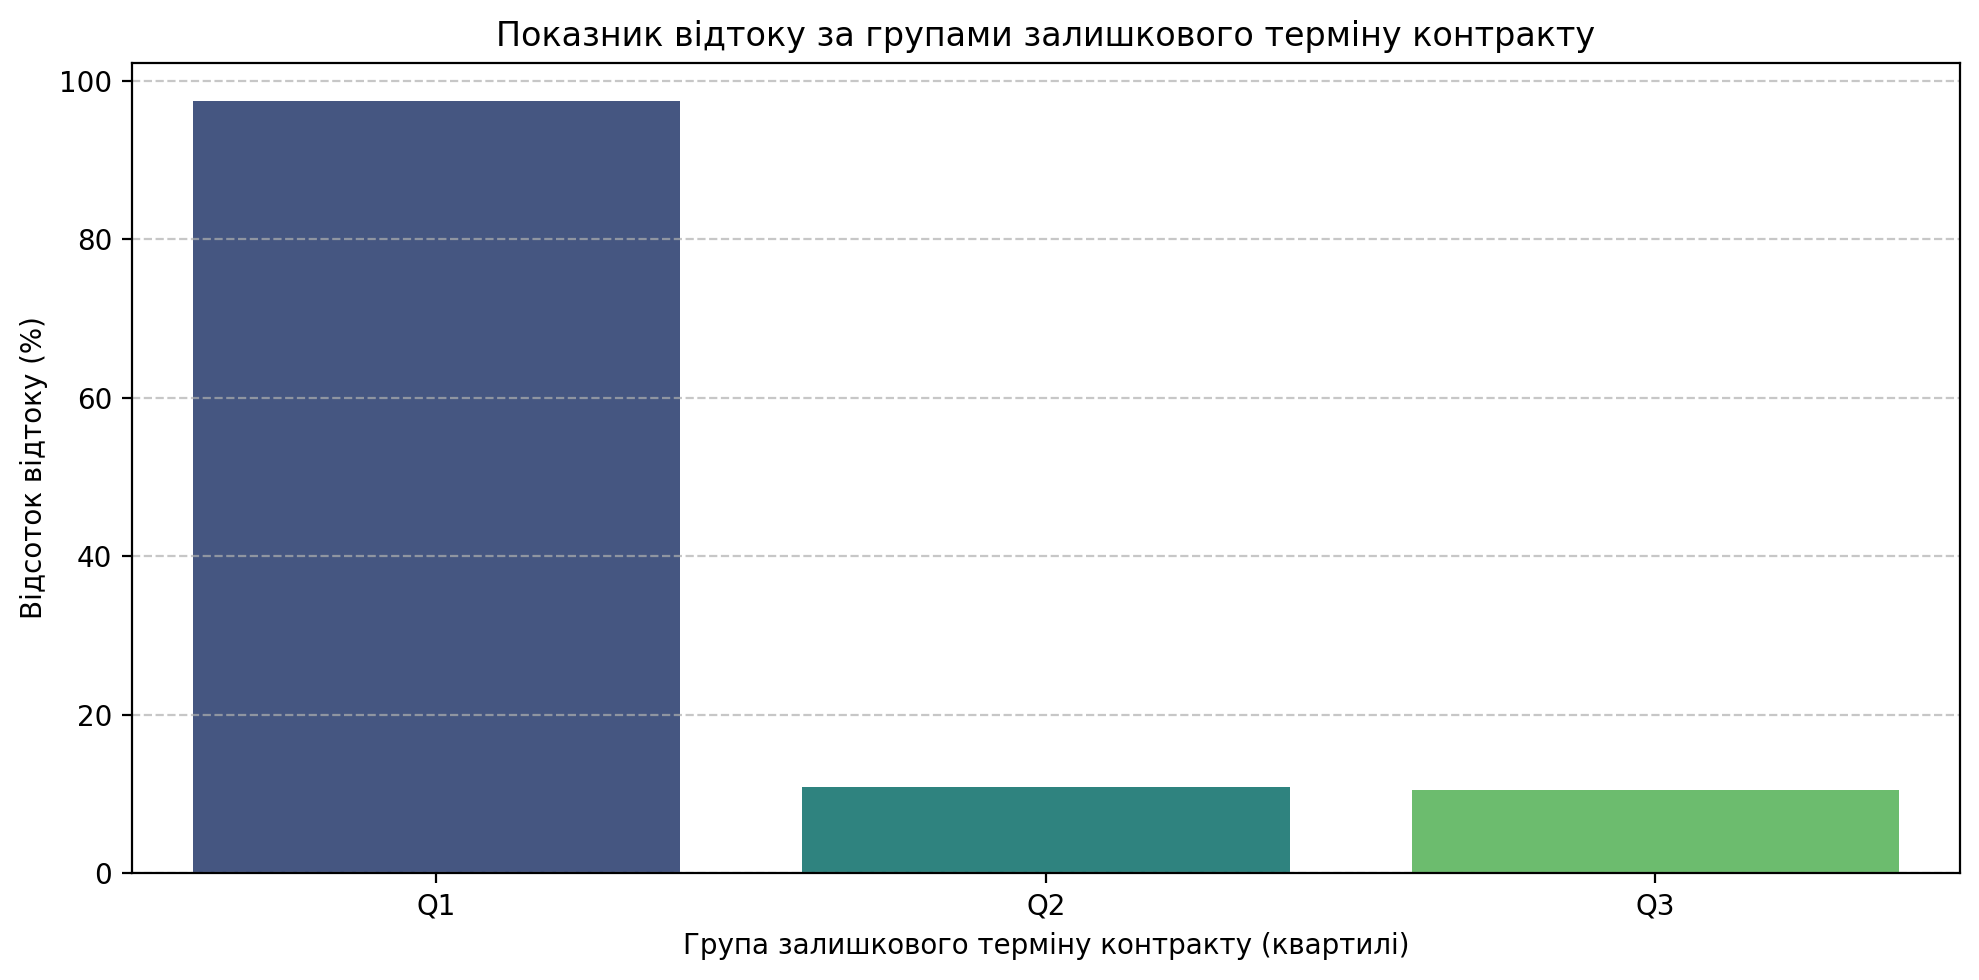

In [16]:
# Створюємо тимчасовий DataFrame для обробки NaN в reamining_contract
temp_df_contract = df.dropna(subset=['reamining_contract']).copy()

# Розбиваємо reamining_contract на 4 квартилі
# Спочатку визначаємо фактичні межі, щоб дізнатися кількість груп
_, bins = pd.qcut(
    temp_df_contract['reamining_contract'],
    q=4,
    duplicates='drop',
    retbins=True # Повертає межі інтервалів
)

# Кількість фактичних груп дорівнює кількості меж мінус один
num_effective_bins = len(bins) - 1

# Генеруємо відповідні мітки
if num_effective_bins > 0:
    new_labels = [f'Q{i+1}' for i in range(num_effective_bins)]
else:

    new_labels = ['SingleGroup']

temp_df_contract['reamining_contract_group'] = pd.qcut(
    temp_df_contract['reamining_contract'],
    q=num_effective_bins if num_effective_bins > 0 else 1, # Використовуємо фактичну кількість груп або 1
    labels=new_labels,
    duplicates='drop'
)

# Розраховуємо показник відтоку для кожної групи залишкового контракту
churn_rate_by_contract_group = temp_df_contract.groupby('reamining_contract_group')['churn'].mean() * 100

plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=churn_rate_by_contract_group.index, y=churn_rate_by_contract_group.values, palette='viridis')
plt.title('Показник відтоку за групами залишкового терміну контракту')
plt.xlabel('Група залишкового терміну контракту (квартилі)')
plt.ylabel('Відсоток відтоку (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Цей графік показує відсоток відтоку для кожної з чотирьох груп, на які було розбито залишковий термін контракту клієнтів (`reamining_contract`). Це допомагає виявити, чи є кореляція між терміном контракту та ймовірністю відтоку.

/tmp/ipython-input-922717080.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby('subscription_age_group')['churn'].mean() * 100
/tmp/ipython-input-922717080.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_age_group.index, y=churn_rate_by_age_group.values, palette='viridis')


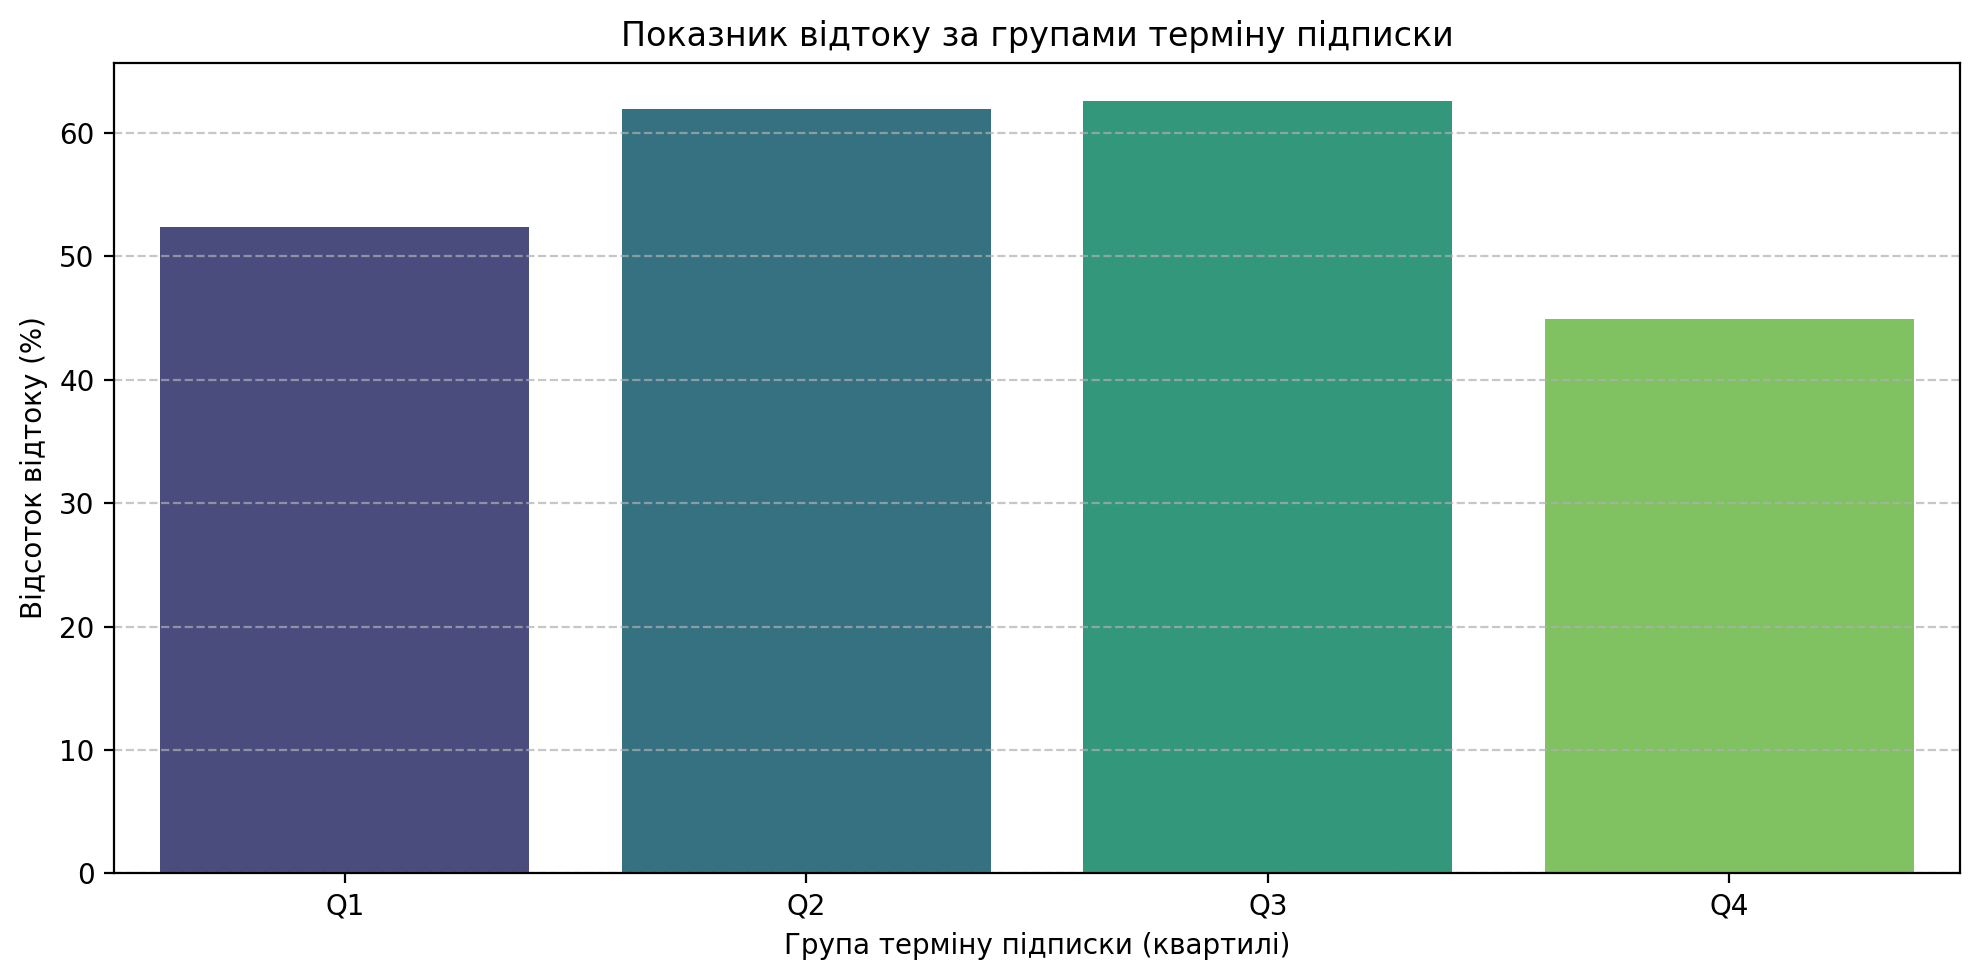

In [17]:
# Розбиваємо subscription_age на 4 квартилі
df['subscription_age_group'] = pd.qcut(df['subscription_age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Розраховуємо показник відтоку для кожної групи віку підписки
churn_rate_by_age_group = df.groupby('subscription_age_group')['churn'].mean() * 100

plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=churn_rate_by_age_group.index, y=churn_rate_by_age_group.values, palette='viridis')
plt.title('Показник відтоку за групами терміну підписки')
plt.xlabel('Група терміну підписки (квартилі)')
plt.ylabel('Відсоток відтоку (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Цей графік показує відсоток відтоку для кожної з чотирьох груп, на які було розбито термін підписки клієнтів (`subscription_age`). Це дозволяє побачити, чи є певні етапи в житті підписки, на яких відтік клієнтів є вищим або нижчим.

/tmp/ipython-input-1513123931.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_download_avg_group = temp_df_download.groupby('download_avg_group')['churn'].mean() * 100
/tmp/ipython-input-1513123931.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_download_avg_group.index, y=churn_rate_by_download_avg_group.values, palette='viridis')


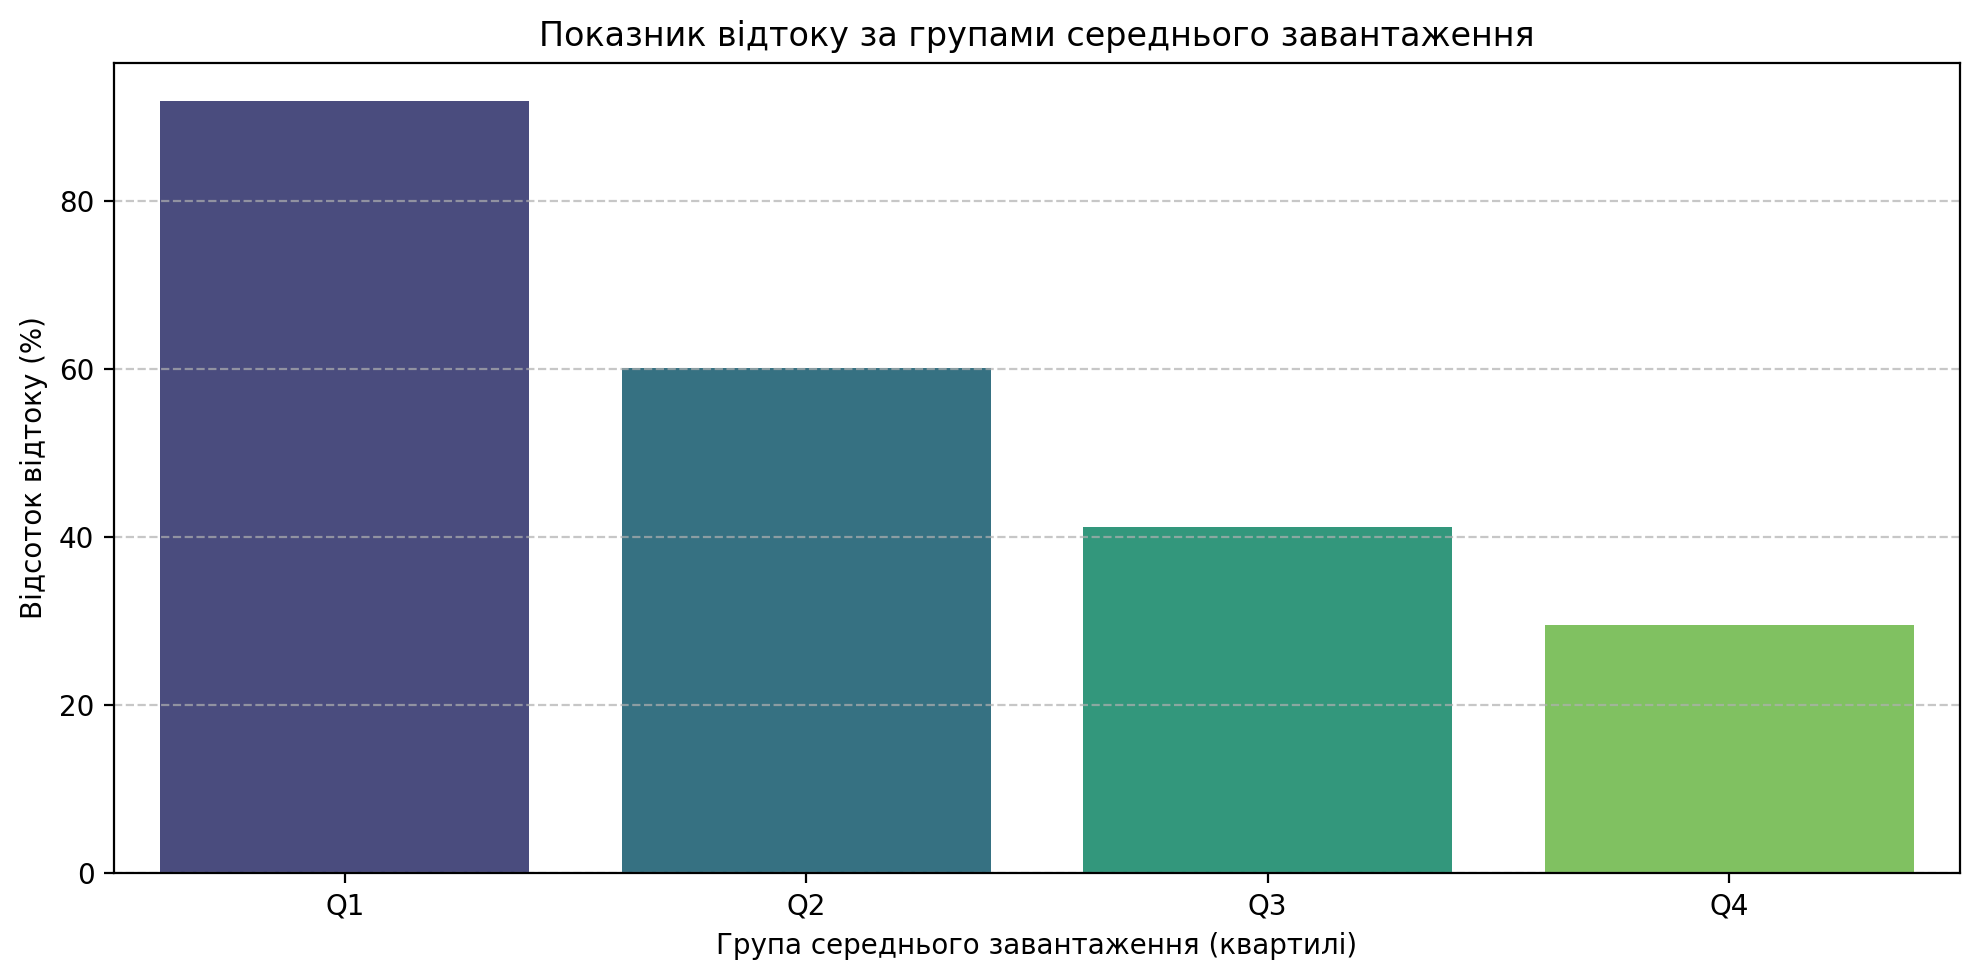

In [18]:
# Створюємо тимчасовий DataFrame для обробки NaN в download_avg
temp_df_download = df.dropna(subset=['download_avg']).copy()

# Розбиваємо download_avg на 4 квартилі
temp_df_download['download_avg_group'] = pd.qcut(temp_df_download['download_avg'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Розраховуємо показник відтоку для кожної групи середнього завантаження
churn_rate_by_download_avg_group = temp_df_download.groupby('download_avg_group')['churn'].mean() * 100

plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(x=churn_rate_by_download_avg_group.index, y=churn_rate_by_download_avg_group.values, palette='viridis')
plt.title('Показник відтоку за групами середнього завантаження')
plt.xlabel('Група середнього завантаження (квартилі)')
plt.ylabel('Відсоток відтоку (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В категорії з низьким трафіком високий відток, який різко спадає

In [19]:
df=df.dropna(subset=['upload_avg'])

In [20]:
df.isna().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21518
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


<Axes: ylabel='reamining_contract'>

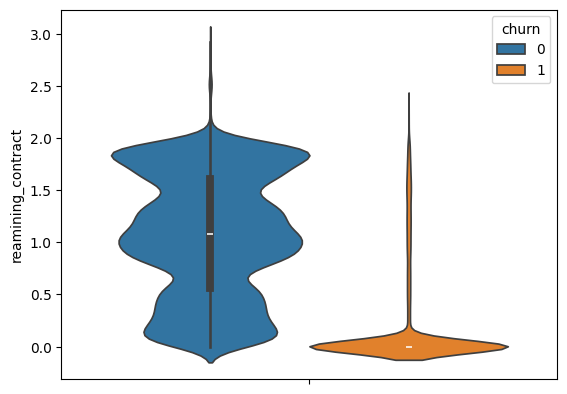

In [21]:
sns.violinplot(data=df, y='reamining_contract', hue='churn')

In [22]:
df.value_counts('churn')

,count
churn,
1,40050
0,31843


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           71893 non-null  int64   
 1   is_tv_subscriber             71893 non-null  int64   
 2   is_movie_package_subscriber  71893 non-null  int64   
 3   subscription_age             71893 non-null  float64 
 4   bill_avg                     71893 non-null  int64   
 5   reamining_contract           50375 non-null  float64 
 6   service_failure_count        71893 non-null  int64   
 7   download_avg                 71893 non-null  float64 
 8   upload_avg                   71893 non-null  float64 
 9   download_over_limit          71893 non-null  int64   
 10  churn                        71893 non-null  int64   
 11  subscription_age_group       71893 non-null  category
dtypes: category(1), float64(4), int64(7)
memory usage: 6.7 MB


In [24]:
# Заповнення пропущених значень в 'reamining_contract' залежно від 'churn'
median_reamining_contract_churn_0 = df[df['churn'] == 0]['reamining_contract'].median()
median_reamining_contract_churn_1 = df[df['churn'] == 1]['reamining_contract'].median()
df.loc[df['churn'] == 0, 'reamining_contract'] = df.loc[df['churn'] == 0, 'reamining_contract'].fillna(median_reamining_contract_churn_0)
df.loc[df['churn'] == 1, 'reamining_contract'] = df.loc[df['churn'] == 1, 'reamining_contract'].fillna(median_reamining_contract_churn_1)

In [25]:
# Перевіряємо поточну кількість пропущених значень
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           71893 non-null  int64   
 1   is_tv_subscriber             71893 non-null  int64   
 2   is_movie_package_subscriber  71893 non-null  int64   
 3   subscription_age             71893 non-null  float64 
 4   bill_avg                     71893 non-null  int64   
 5   reamining_contract           71893 non-null  float64 
 6   service_failure_count        71893 non-null  int64   
 7   download_avg                 71893 non-null  float64 
 8   upload_avg                   71893 non-null  float64 
 9   download_over_limit          71893 non-null  int64   
 10  churn                        71893 non-null  int64   
 11  subscription_age_group       71893 non-null  category
dtypes: category(1), float64(4), int64(7)
memory usage: 6.7 MB


<Axes: ylabel='reamining_contract'>

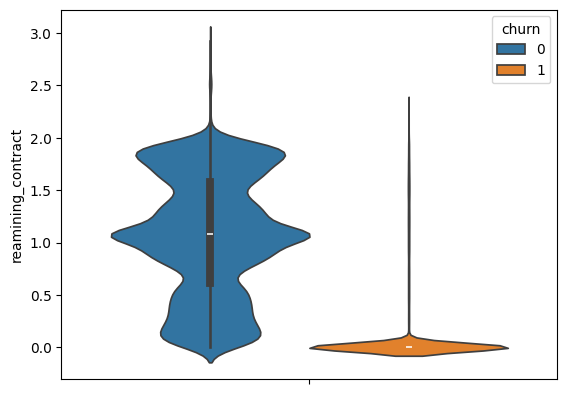

In [26]:
sns.violinplot(data=df, y='reamining_contract', hue='churn')

In [27]:
df=pd.get_dummies(df, drop_first=True)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['id', 'churn'], axis=1)
y=df['churn']

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [31]:
scaler=StandardScaler()

In [32]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score, f1_score, confusion_matrix

In [34]:
#  Створення МІНІМАЛЬНОГО КОНВЕЄРА
# Конвеєр містить лише модель (estimator), оскільки попередню обробку вже виконано.
pipeline = Pipeline([
    ('estimator', LogisticRegression()) # Заповнювач
])

#  Визначення Комплексної Сітки Параметрів (param_grid)
param_grid = [
    # 🎯 Група 1: ЛОГІСТИЧНА РЕГРЕСІЯ
    {
        'estimator': [LogisticRegression(solver='liblinear', random_state=101)],
        'estimator__C': [0.01, 0.1, 1.0, 10.0],
        'estimator__penalty': ['l1', 'l2']
    },

    # 🎯 Група 2: K-НАЙБЛИЖЧІ СУСІДИ (KNN)
    {
        'estimator': [KNeighborsClassifier()],
        'estimator__n_neighbors': [2, 3, 4, 5, 7, 10],
        'estimator__weights': ['uniform', 'distance']
    },

    # 🎯 Група 3: ВИПАДКОВИЙ ЛІС
    {
        'estimator': [RandomForestClassifier(random_state=101)],
        'estimator__n_estimators': [50, 75, 100, 150],
        'estimator__max_depth': [3, 5, 7, 9],
        'estimator__min_samples_split': [2, 5]
    },

    # 🎯 Група 4: ГРАДІЄНТНИЙ БУСТИНГ
    {
        'estimator': [GradientBoostingClassifier(random_state=101)],
        'estimator__n_estimators': [50, 75, 100, 150],
        'estimator__learning_rate': [0.01, 0.05, 0.1]
    },

    # 🎯 Група 5: ДЕРЕВО РІШЕНЬ
    {
        'estimator': [DecisionTreeClassifier(random_state=101)],
        'estimator__max_depth': [3, 5, 6, 8, 10],
        'estimator__min_samples_leaf': [10, 20, 30]
    }
]

In [35]:
#  Запуск Grid Search (з метрикою accuracy)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [36]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 79 candidates, totalling 395 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'estimator': [LogisticRegression(random_state=101,
                                                           solver='liblinear')],
                          'estimator__C': [0.01, 0.1, 1.0, 10.0],
                          'estimator__penalty': ['l1', 'l2']},
                         {'estimator': [KNeighborsClassifier()],
                          'estimator__n_neighbors': [2, 3, 4, 5, 7, 10],
                          'estimator__weights': ['unifor...
                          'estimator__n_estimators': [50, 75, 100, 150]},
                         {'estimator': [GradientBoostingClassifier(random_state=101)],
                          'estimator__learning_rate': [0.01, 0.05, 0.1],
                          'estimator__n_estimators': [50, 75, 100, 150]},
                         {'estimator': [DecisionTreeClassifier(random_state=101)],
                          'estimator__max_depth': [3, 5, 6, 8, 10],
                          'estimator__min_samples_leaf': [10, 20, 30]}],
             scoring='accuracy', verbose=1)

In [37]:
# Аналіз Результатів
print("\n----------------------------------------------------")
print("⭐ Результати комплексного пошуку найкращої моделі:")
print(f"Найкраща оцінка accuracy (на крос-валідації): {grid_search.best_score_:.4f}")
print(f"Найкращі параметри: {grid_search.best_params_}")
print("----------------------------------------------------")

# Оцінка на незалежному тестовому наборі
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy найкращої моделі на тестовому наборі: {acc:.4f}")
print("----------------------------------------------------\n")
print("Повний звіт метрік моделі:")
print(classification_report(y_pred, y_test))


----------------------------------------------------
⭐ Результати комплексного пошуку найкращої моделі:
Найкраща оцінка accuracy (на крос-валідації): 0.9639
Найкращі параметри: {'estimator': DecisionTreeClassifier(random_state=101), 'estimator__max_depth': 10, 'estimator__min_samples_leaf': 10}
----------------------------------------------------
accuracy найкращої моделі на тестовому наборі: 0.9639
----------------------------------------------------

Повний звіт метрік моделі:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8502
           1       0.94      0.99      0.97      9472

    accuracy                           0.96     17974
   macro avg       0.97      0.96      0.96     17974
weighted avg       0.97      0.96      0.96     17974



In [38]:
final_model=DecisionTreeClassifier(random_state=101, max_depth=10, min_samples_leaf=10)

In [39]:
import numpy as np
X_full = np.concatenate((X_train, X_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)

In [40]:
final_model.fit(X_full, y_full)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=101)

In [41]:
pred=final_model.predict(X_full)
print("⭐ Результати найкращої моделі:")
print(classification_report(y_full, pred))

⭐ Результати найкращої моделі:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     31843
           1       1.00      0.94      0.97     40050

    accuracy                           0.97     71893
   macro avg       0.96      0.97      0.97     71893
weighted avg       0.97      0.97      0.97     71893



In [42]:
import joblib
# Збереження моделі у файл
file_name = 'best_decision_tree_final.joblib'
joblib.dump(final_model, file_name)

['best_decision_tree_final.joblib']

In [43]:
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn', 'subscription_age_group_Q2',
       'subscription_age_group_Q3', 'subscription_age_group_Q4'],
      dtype='object')

In [44]:
dfX_full=pd.DataFrame(X_full, columns=['is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'subscription_age_group_Q2',
       'subscription_age_group_Q3', 'subscription_age_group_Q4'])
dfy_full=pd.DataFrame(y_full, columns=['churn'])

In [45]:
df_full=pd.concat([dfX_full, dfy_full], axis=1)
df_full.to_csv('dataset.csv')
from google.colab import files
dw=files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>